## Testing `Game`

In [17]:
import sys
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sys.path.append(os.path.abspath('..'))

from core.engine.main import Game

from core.agents.random import Random

In [18]:
agents = [Random(i) for i in range(4)]
game = Game(agents, 0)
game._initialise_game()

In [19]:
print(game.data['pregame']['deck'])
print(len(game.data['pregame']['deck']))
for i in range(4):
    print(game.data['pregame']['starting_hands'][i],"-", len(game.data['pregame']['starting_hands'][i]),"-", game.data['pregame']['starting_specials'][i])
print(game.data['pregame']['starting_player'])
print(game.data['pregame']['starting_wind'])

[27, 28, 27, 28, 12, 24, 64, 41, 21, 14, 28, 53, 8, 23, 18, 2, 15, 26, 12, 43, 42, 42, 31, 3, 22, 2, 17, 63, 26, 1, 3, 54, 4, 13, 33, 23, 28, 33, 25, 23, 7, 25, 16, 8, 32, 21, 41, 8, 18, 2, 7, 6, 24, 18, 4, 9, 33, 7, 42, 24, 2, 22, 21, 34, 15, 7, 13, 5, 3, 17, 29, 29, 11, 29, 1, 15, 14, 22, 9, 13, 26, 14, 1, 32, 43, 15, 19]
87
[3, 14, 4, 6, 9, 27, 6, 11, 29, 16, 32, 5, 5] - 13 - [52, 62]
[34, 17, 34, 4, 42, 6, 13, 5, 16, 23, 41, 19, 27] - 13 - []
[18, 21, 1, 31, 12, 33, 31, 25, 9, 25, 43, 11, 31, 8] - 14 - [61]
[43, 34, 19, 41, 24, 22, 17, 26, 11, 32, 12, 16, 19] - 13 - [51]
2
0


In [20]:
game._main_loop()

{'result': 'draw'}

In [21]:
times = []
stds = []

for _ in range(1000):
        agents = [Random(i) for i in range(4)]
        game = Game(agents, 0)
        game._initialise_game()
        start_time = time.perf_counter()
        game._main_loop()
        end_time = time.perf_counter()
        times.append(end_time - start_time)

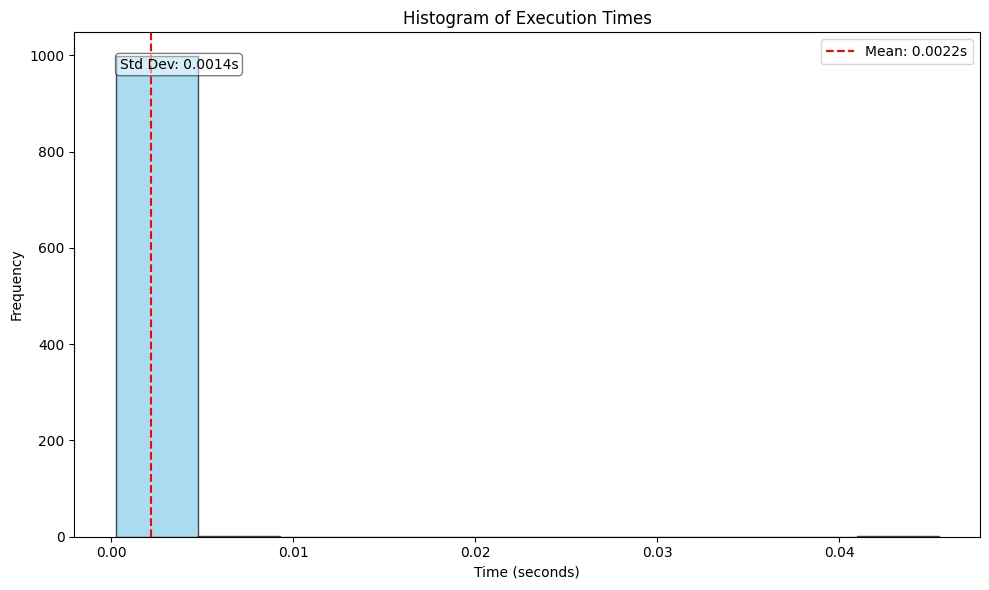

In [22]:
plt.figure(figsize=(10, 6))

# Create histogram
plt.hist(times, bins=10, alpha=0.7, color='skyblue', edgecolor='black')

plt.title('Histogram of Execution Times')
plt.ylabel('Frequency')
plt.xlabel('Time (seconds)')

# Add a vertical line for the mean
plt.axvline(x=np.mean(times), color='r', linestyle='--', 
           label=f'Mean: {np.mean(times):.4f}s')

# Add a text annotation for standard deviation
plt.text(0.05, 0.95, f'Std Dev: {np.std(times):.4f}s', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.legend()
plt.tight_layout()
plt.show()

## Testing `Table`

In [23]:
from core.engine.table import Table

In [24]:
times = []
stds = []
max_games = 20

for param in range(1,max_games+1):
    trial_times = []
    for _ in range(5):
        start_time = time.perf_counter()
        agents = [Random(i) for i in range(4)]
        table = Table(agents,param)
        table.play_games()
        end_time = time.perf_counter()
        trial_times.append(end_time - start_time)
    
    times.append(np.mean(trial_times))
    stds.append(np.std(trial_times))

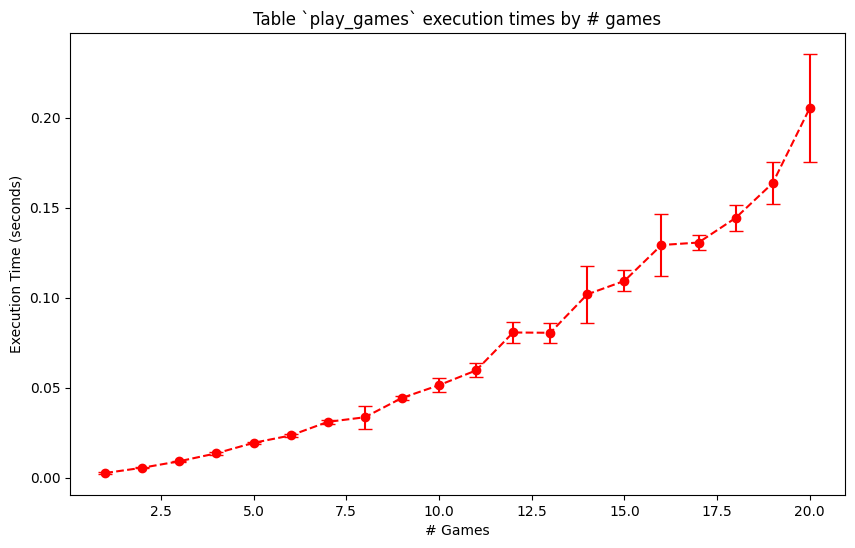

In [25]:
plt.figure(figsize=(10, 6))
plt.errorbar(list(range(1,max_games+1)), times, yerr=stds, fmt='o--', capsize=5, c='red')
plt.xlabel('# Games')
plt.ylabel('Execution Time (seconds)')
plt.title("Table `play_games` execution times by # games")
plt.show()